# TITANIC PROJECT

 You have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

In [1]:
# Importing 
import numpy as np
import pandas as pd
from scipy.stats import  chi2_contingency
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_raw = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [3]:
df  =  pd.read_csv(r'C:/Users/user/Desktop/DT Python/titanic_train.csv')
df

Unnamed: 0  PassengerId  Survived  Pclass  \
0             0            1         0       3   
1             1            2         1       1   
2             2            3         1       3   
3             3            4         1       1   
4             4            5         0       3   
..          ...          ...       ...     ...   
886         886          887         0       2   
887         887          888         1       1   
888         888          889         0       3   
889         889          890         1       1   
890         890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 13 columns]

In [4]:
df.describe()

Unnamed: 0  PassengerId    Survived      Pclass         Age  \
count  891.000000   891.000000  891.000000  891.000000  714.000000   
mean   445.000000   446.000000    0.383838    2.308642   29.699118   
std    257.353842   257.353842    0.486592    0.836071   14.526497   
min      0.000000     1.000000    0.000000    1.000000    0.420000   
25%    222.500000   223.500000    0.000000    2.000000   20.125000   
50%    445.000000   446.000000    0.000000    3.000000   28.000000   
75%    667.500000   668.500000    1.000000    3.000000   38.000000   
max    890.000000   891.000000    1.000000    3.000000   80.000000   

            SibSp       Parch        Fare  
count  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208  
std      1.102743    0.806057   49.693429  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400  
50%      0.000000    0.000000   14.454200  
75%      1.000000    0.000000   31.000000  
max      8.000000    6.000000  512.329200

In [5]:
df.describe(include='all')

Unnamed: 0  PassengerId    Survived      Pclass  \
count   891.000000   891.000000  891.000000  891.000000   
unique         NaN          NaN         NaN         NaN   
top            NaN          NaN         NaN         NaN   
freq           NaN          NaN         NaN         NaN   
mean    445.000000   446.000000    0.383838    2.308642   
std     257.353842   257.353842    0.486592    0.836071   
min       0.000000     1.000000    0.000000    1.000000   
25%     222.500000   223.500000    0.000000    2.000000   
50%     445.000000   446.000000    0.000000    3.000000   
75%     667.500000   668.500000    1.000000    3.000000   
max     890.000000   891.000000    1.000000    3.000000   

                           Name   Sex         Age       SibSp       Parch  \
count                       891   891  714.000000  891.000000  891.000000   
unique                      891     2         NaN         NaN         NaN   
top     Braund, Mr. Owen Harris  male         NaN         NaN         NaN   
freq                          1   577         NaN         NaN         NaN   
mean                        NaN   NaN   29.699118    0.523008    0.381594   
std                         NaN   NaN   14.526497    1.102743    0.806057   
min                         NaN   NaN    0.420000    0.000000    0.000000   
25%                         NaN   NaN   20.125000    0.000000    0.000000   
50%                         NaN   NaN   28.000000    0.000000    0.000000   
75%                         NaN   NaN   38.000000    1.000000    0.000000   
max                         NaN   NaN   80.000000    8.000000    6.000000   

        Ticket        Fare    Cabin Embarked  
count      891  891.000000      204      889  
unique     681         NaN      147        3  
top     347082         NaN  B96 B98        S  
freq         7         NaN        4      644  
mean       NaN   32.204208      NaN      NaN  
std        NaN   49.693429      NaN      NaN  
min        NaN    0.000000      NaN      NaN  
25%        NaN    7.910400      NaN      NaN  
50%        NaN   14.454200      NaN      NaN  
75%        NaN   31.000000      NaN      NaN  
max        NaN  512.329200      NaN      NaN

In [6]:
df.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

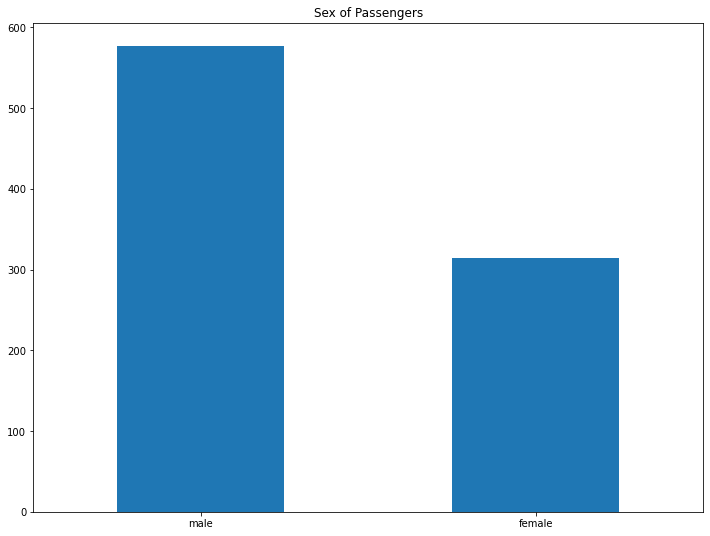

In [8]:
plt.subplot()
df['Sex'].value_counts().plot(kind='bar',title='Sex of Passengers',figsize=(12,9))
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]),
 [Text(0, 0, '24.0'),
  Text(1, 0, '22.0'),
  Text(2, 0, '18.0'),
  Text(3, 0, '19.0'),
  Text(4, 0, '28.0'),
  Text(5, 0, '30.0'),
  Text(6, 0, '21.0'),
  Text(7, 0, '25.0'),
  Text(8, 0, '36.0'),
  Text(9, 0, '29.0'),
  Text(10, 0, '32.0'),
  Text(11, 0, '35.0'),
  Text(12, 0, '27.0'),
  Text(13, 0, '26.0'),
  Text(14, 0, '16.0'),
  Text(15, 0, '31.0'),
  Text(16, 0, '20.0'),
  Text(17, 0, '34.0'),
  Text(18, 0, '33.0'),
  Text(19, 0, '23.0'),
  Text(20, 0, '39.0'),
  Text(21, 0, '40.0'),
  Text(22, 0, '17.0'),
  Text(23, 0, '42.0'),
  Text(24, 0, '45.0'),
  Text(25, 0, '38.0'),
  Text(26,

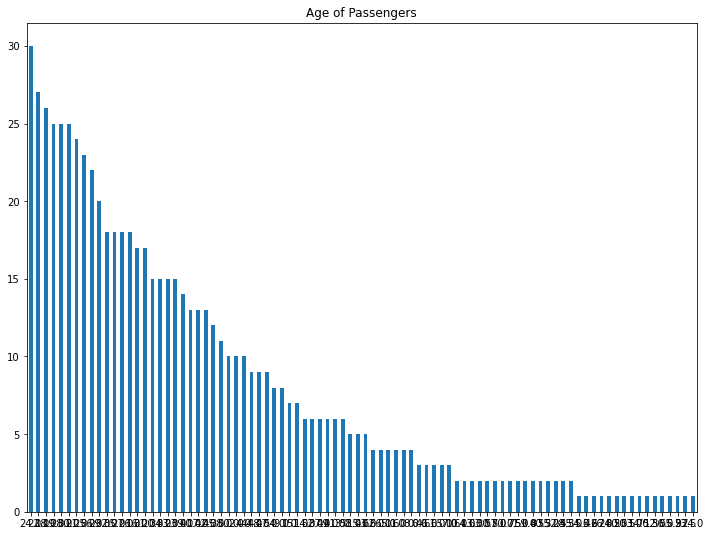

In [9]:
plt.subplot()
df['Age'].value_counts().plot(kind='bar',title='Age of Passengers',figsize=(12,9))
plt.xticks(rotation=0)

(array([0, 1, 2]), [Text(0, 0, '3'), Text(1, 0, '1'), Text(2, 0, '2')])

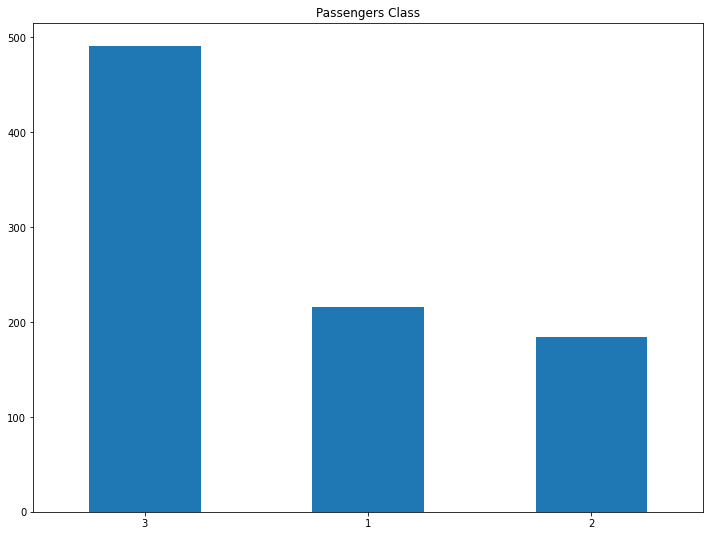

In [10]:
plt.subplot()
df['Pclass'].value_counts().plot(kind='bar',title='Passengers Class',figsize=(12,9))
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

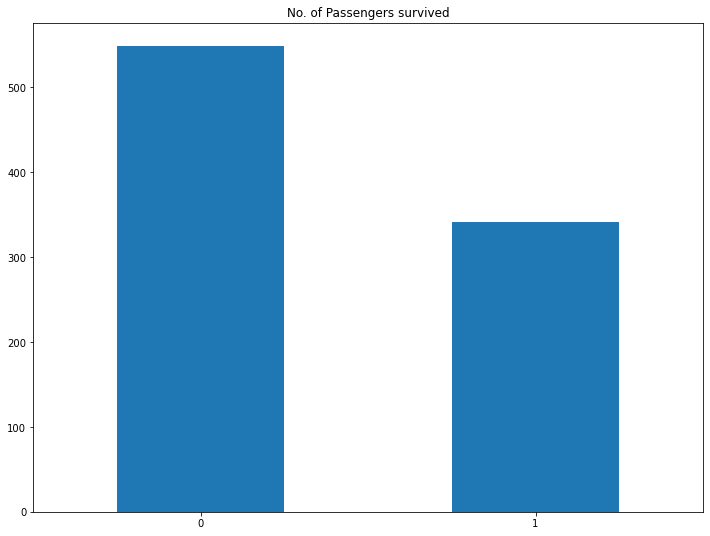

In [11]:
plt.subplot()
df['Survived'].value_counts().plot(kind='bar',title='No. of Passengers survived',figsize=(12,9))
plt.xticks(rotation=0)

<AxesSubplot:>

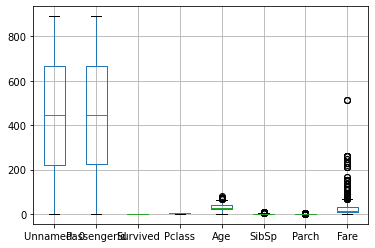

In [12]:
df.boxplot()

In [13]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Survived', ylabel='Density'>

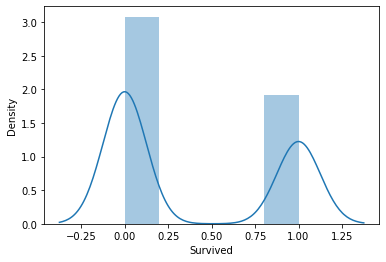

In [14]:
sns.distplot(df['Survived'])

In [15]:
corr=df.corr()

In [16]:
corr

Unnamed: 0  PassengerId  Survived    Pclass       Age     SibSp  \
Unnamed: 0     1.000000     1.000000 -0.005007 -0.035144  0.036847 -0.057527   
PassengerId    1.000000     1.000000 -0.005007 -0.035144  0.036847 -0.057527   
Survived      -0.005007    -0.005007  1.000000 -0.338481 -0.077221 -0.035322   
Pclass        -0.035144    -0.035144 -0.338481  1.000000 -0.369226  0.083081   
Age            0.036847     0.036847 -0.077221 -0.369226  1.000000 -0.308247   
SibSp         -0.057527    -0.057527 -0.035322  0.083081 -0.308247  1.000000   
Parch         -0.001652    -0.001652  0.081629  0.018443 -0.189119  0.414838   
Fare           0.012658     0.012658  0.257307 -0.549500  0.096067  0.159651   

                Parch      Fare  
Unnamed: 0  -0.001652  0.012658  
PassengerId -0.001652  0.012658  
Survived     0.081629  0.257307  
Pclass       0.018443 -0.549500  
Age         -0.189119  0.096067  
SibSp        0.414838  0.159651  
Parch        1.000000  0.216225  
Fare         0.216225  1.000000

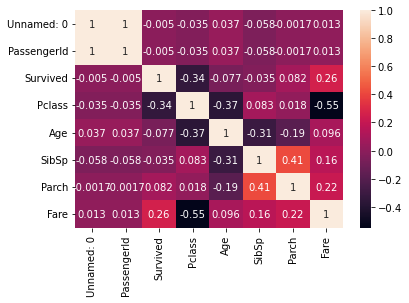

In [17]:
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0)
plt.show()

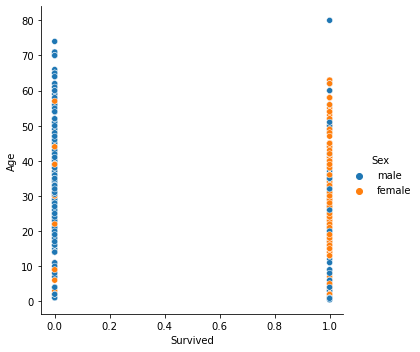

In [18]:
sns.relplot(x='Survived' , y='Age' , hue='Sex' , data=df)

<AxesSubplot:>

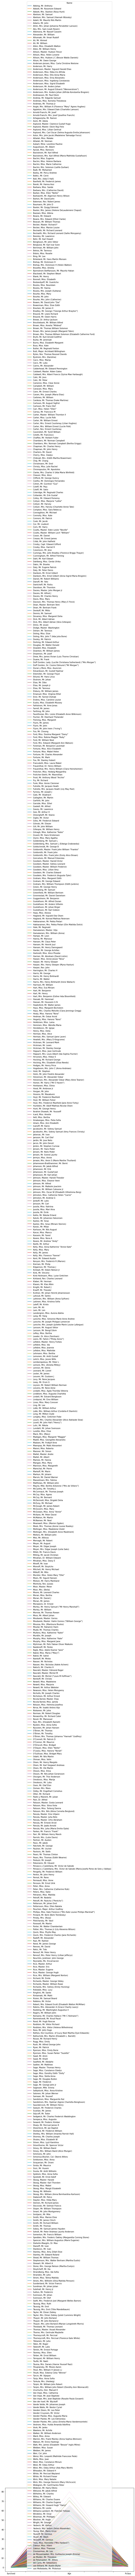

In [19]:
df.groupby('Name')[['Survived' , 'Age' , 'Pclass']].mean().T.plot(figsize=(12,8))

Unnamed: 0  PassengerId  Survived  Pclass  \
0           0            1         0       3   
1           1            2         1       1   
2           2            3         1       3   
3           3            4         1       1   
4           4            5         0       3   
5           5            6         0       3   
6           6            7         0       1   
7           7            8         0       3   
8           8            9         1       3   
9           9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

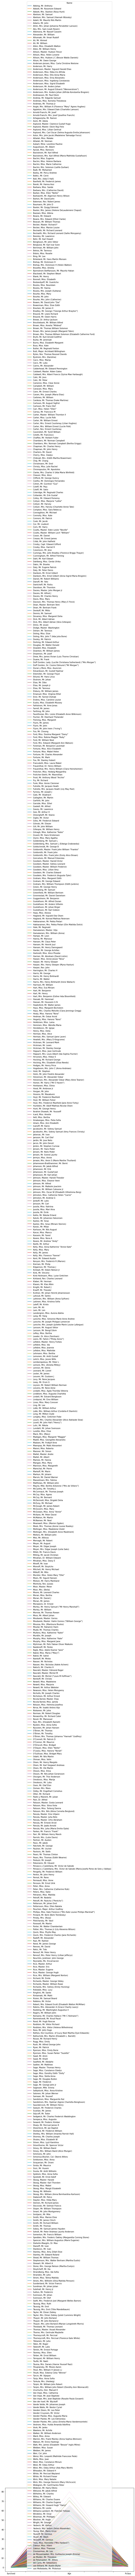

In [20]:
# first 10 passengers
df.groupby('Name')[['Survived' , 'Age' , 'Pclass']].mean().T.plot(figsize=(12,8))
df[0:10]

In [21]:
df.head()

Unnamed: 0  PassengerId  Survived  Pclass  \
0           0            1         0       3   
1           1            2         1       1   
2           2            3         1       3   
3           3            4         1       1   
4           4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [22]:
df.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
df.iterrows

<bound method DataFrame.iterrows of      Unnamed: 0  PassengerId  Survived  Pclass  \
0             0            1         0       3   
1             1            2         1       1   
2             2            3         1       3   
3             3            4         1       1   
4             4            5         0       3   
..          ...          ...       ...     ...   
886         886          887         0       2   
887         887          888         1       1   
888         888          889         0       3   
889         889          890         1       1   
890         890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily Ma

In [24]:
# check number of unique values for every column
for col in df.columns:
    print(col + ' : ' + str(df[col].nunique()) + 'unique values')
print('_'*80)
print(df.info())
print('_'*80)
print(df.describe())
print('_'*80)
print(df.describe(include='all'))
print('_'*80)
# check for missing values in every column
print('Number of missing value(s) in every column (df) : ')
print(df.isnull().sum())


Unnamed: 0 : 891unique values
PassengerId : 891unique values
Survived : 2unique values
Pclass : 3unique values
Name : 891unique values
Sex : 2unique values
Age : 88unique values
SibSp : 7unique values
Parch : 7unique values
Ticket : 681unique values
Fare : 248unique values
Cabin : 147unique values
Embarked : 3unique values
________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-n

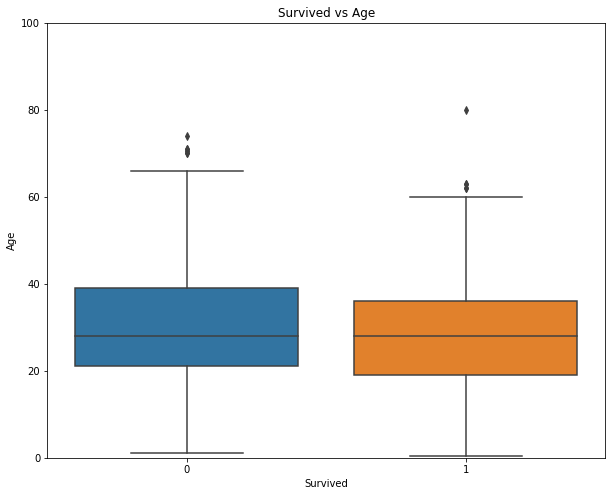

In [25]:
fig, ax=plt.subplots(1,figsize=(10,8))
sns.boxplot(x='Survived' , y='Age' , data=df)
ax.set_ylim(0,100)
plt.title("Survived vs Age")
plt.show()


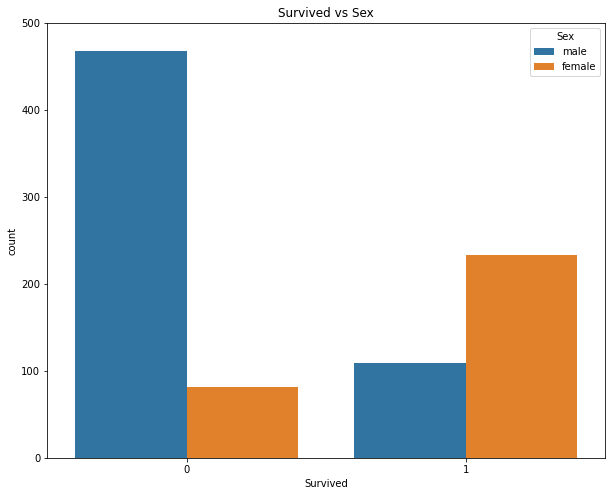

In [26]:
fig, ax=plt.subplots(1, figsize=(10,8))
sns.countplot(x='Survived' , hue='Sex' , data=df)
ax.set_ylim(0,500)
plt.title("Survived vs Sex")
plt.show()


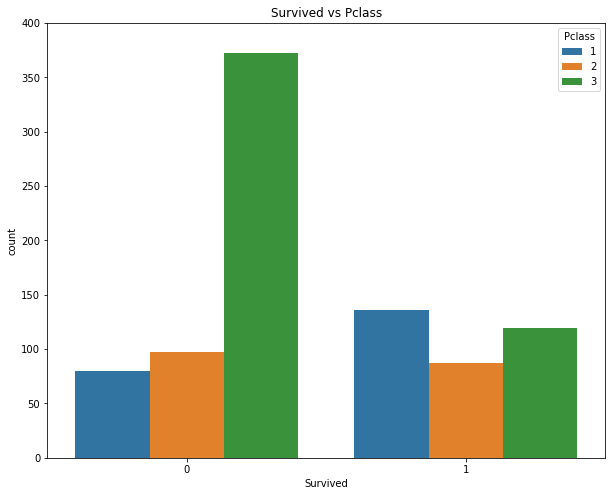

In [27]:
fig, ax=plt.subplots(1, figsize=(10,8))
sns.countplot(x='Survived' ,hue='Pclass' , data=df)
ax.set_ylim(0,400)
plt.title("Survived vs Pclass")
plt.show()


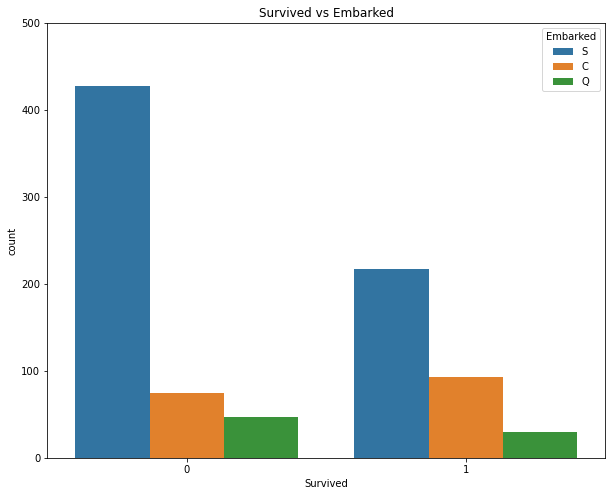

In [28]:
fig, ax=plt.subplots(1,figsize=(10,8))
sns.countplot(x='Survived' , hue='Embarked' , data=df)
ax.set_ylim(0,500)
plt.title("Survived vs Embarked")
plt.show()


Check correlation between Embarked & Pclass



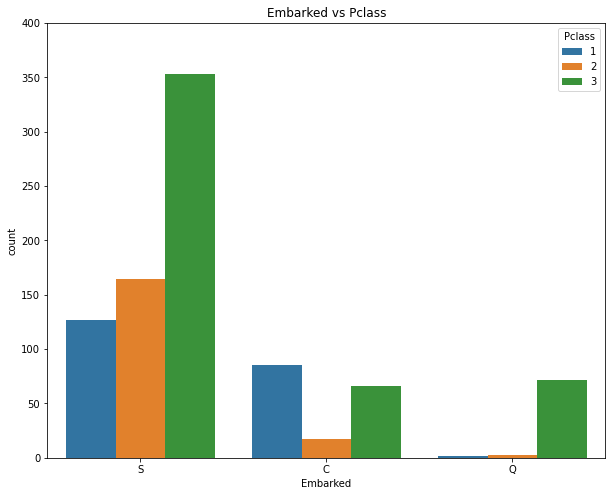

In [29]:
fig, ax=plt.subplots(1, figsize=(10,8))
sns.countplot(x='Embarked', hue='Pclass' , data=df)
ax.set_ylim(0,400)
plt.title("Embarked vs Pclass")
print('Check correlation between Embarked & Pclass\n')
plt.show()


In [30]:
df = df.drop(['PassengerId' , 'Ticket' , 'Cabin'], axis=1)
df_raw = df_raw.drop(['Ticket' , 'Cabin'], axis = 1)
combine =[df, df_raw]

In [31]:
for df in combine:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [32]:
for df in combine:
    df['Title'] = df['Name'].str.extract( ' ([A-Za-z]+)\.' , expand =False)
    
pd.crosstab(df['Title'], df['Sex'])
    

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

In [33]:
common = ['Master' , 'Mr' , 'Miss' , 'Mrs']
for df in combine:
    df['Title'] = df['Title'].replace('Mlle' , 'Miss')
    df['Title'] = df['Title'].replace('Ms' , 'Miss')
    df['Title'] = df['Title'].replace('Mme' , 'Miss')
    df['Title'] = [x if x in common else 'Rare' for x in df['Title']]
    
df['Title'].value_counts()

Mr        517
Miss      186
Mrs       125
Master     40
Rare       23
Name: Title, dtype: int64

In [34]:
for df in combine:
    df['Sex'] = df['Sex'].map({'female' : 0, 'male' : 1})
    # df['Title'] = df['Title'].ma(['Mr' : 0, 'Miss' : 1, 'Mrs' : 2, 'Master' : 3, 'Rare' : 4])

title_ohe1  =  pd.get_dummies(df['Title'], prefix= 'Title' , drop_first = True) 
df=pd.concat([df.drop('Title', axis=1), title_ohe1], axis=1)


In [35]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886                              Montvila, Rev. Juozas    1  27.0      0   
887                       Graham, Miss. Margaret Edith    0  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"    0   NaN      1   
889                              Behr, Mr. Karl Howell    1  26.0      0   
890                                Dooley, Mr. Patrick    1  32.0      0   

     Parch     Fare Embarked  FamilySize  Title_Miss  Title_Mr  Title_Mrs  \
0        0   7.2500        S           2           0         1          0   
1        0  71.2833        C           2           0         0          1   
2        0   7.9250        S           1           1         0          0   
3        0  53.1000        S           2           0         0          1   
4        0   8.0500        S           1           0         1          0   
..     ...      ...      ...         ...         ...       ...        ...   
886      0  13.0000        S           1           0         0          0   
887      0  30.0000        S           1           1         0          0   
888      2  23.4500        S           4           1         0          0   
889      0  30.0000        C           1           0         1          0   
890      0   7.7500        Q           1           0         1          0   

     Title_Rare  
0             0  
1             0  
2             0  
3             0  
4             0  
..          ...  
886           1  
887           0  
888           0  
889           0  
890           0  

[891 rows x 15 columns]

In [36]:
age_corr = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
age_corr.rename(columns={"level_0" : "Feature 1" , "level_1" : "Feature 2" , 0: 'Correlation Coefficient'}, inplace=True)
age_corr[age_corr['Feature 1']  == 'Age' ]

Feature 1    Feature 2  Correlation Coefficient
8         Age          Age                 1.000000
35        Age       Pclass                 0.369226
47        Age        SibSp                 0.308247
50        Age   FamilySize                 0.301914
52        Age   Title_Miss                 0.278495
68        Age     Title_Mr                 0.206341
71        Age   Title_Rare                 0.194639
76        Age        Parch                 0.189119
84        Age    Title_Mrs                 0.180278
106       Age         Fare                 0.096067
107       Age          Sex                 0.093254
118       Age     Survived                 0.077221
143       Age  PassengerId                 0.036847

In [37]:
impute_ages = np.zeros((2,3))
for df in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            impute_df = df[(df['Sex'] == i) & \
                                  (df['Pclass'] == j+1)]['Age'].dropna()
            impute_ages[i,j] = int(impute_df.median())
            
    for i in range(0, 2):
        for j in range(0, 3):
            df.loc[ (df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j+1), 'Age'] = impute_ages[i,j]

In [38]:
impute_embarked = [' ' , ' ' , ' ']
for df in combine:
    for i in range(0, 3):
        impute_val = df[df['Pclass'] == i+1]['Embarked'].dropna().mode()[0]
        impute_embarked[i] = impute_val
    for i in range(0, 3):
        df.loc[ (df.Embarked.isnull()) & (df.Pclass == i+1), 'Embarked'] = impute_embarked[i]
        

In [39]:
# for df in combine:
#df['Embarked'] = df['Embarked'].map({'S':0,'C':1,'Q':2})

embarked_ohe1=pd.get_dummies(df['Embarked'],prefix='Embarked',drop_first=True)
df=pd.concat([df.drop('Embarked' , axis=1), embarked_ohe1], axis=1)

In [40]:
imputer  = SimpleImputer()
df['Fare'] = list(imputer.fit_transform(df[['Fare']]))
df['Fare'] = [x[0] for x in df['Fare']]

# check if there's any missing values left
print('Number of missing value(s) in every column (df) : ')
print(df.isnull().sum())

Number of missing value(s) in every column (df) : 
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
FamilySize     0
Title          0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [42]:
x  =  df.drop(columns = 'Survived')
x = pd.get_dummies(x, drop_first = True)

y  = df['Survived']

In [43]:
x

PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  FamilySize  \
0              1       3    1  22.0      1      0   7.2500           2   
1              2       1    0  38.0      1      0  71.2833           2   
2              3       3    0  26.0      0      0   7.9250           1   
3              4       1    0  35.0      1      0  53.1000           2   
4              5       3    1  35.0      0      0   8.0500           1   
..           ...     ...  ...   ...    ...    ...      ...         ...   
886          887       2    1  27.0      0      0  13.0000           1   
887          888       1    0  19.0      0      0  30.0000           1   
888          889       3    0  21.0      1      2  23.4500           4   
889          890       1    1  26.0      0      0  30.0000           1   
890          891       3    1  32.0      0      0   7.7500           1   

     Embarked_Q  Embarked_S  ...  \
0             0           1  ...   
1             0           0  ...   
2             0           1  ...   
3             0           1  ...   
4             0           1  ...   
..          ...         ...  ...   
886           0           1  ...   
887           0           1  ...   
888           0           1  ...   
889           0           0  ...   
890           1           0  ...   

     Name_de Messemaeker, Mrs. Guillaume Joseph (Emma)  \
0                                                    0   
1                                                    0   
2                                                    0   
3                                                    0   
4                                                    0   
..                                                 ...   
886                                                  0   
887                                                  0   
888                                                  0   
889                                                  0   
890                                                  0   

     Name_de Mulder, Mr. Theodore  Name_de Pelsmaeker, Mr. Alfons  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   
..                            ...                             ...   
886                             0                               0   
887                             0                               0   
888                             0                               0   
889                             0                               0   
890                             0                               0   

     Name_del Carlo, Mr. Sebastiano  Name_van Billiard, Mr. Austin Blyler  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
..                              ...                                   ...   
886                               0                                     0   
887                               0                                     0   
888                               0                                     0   
889                               0                                     0   
890                               0                                     0   

     Name_van Melkebeke, Mr. Philemon  Title_Miss  Title_Mr  Title_Mrs  \
0                                   0           0         1          0   
1                                   0           0         0          1   
2         

In [44]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
def find_best_model(x_train,x_test,y_train,y_test):
    lr = LogisticRegression(max_iter = 600, random_state = 42)
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    lr_acc = round(metrics.accuracy_score(y_test,y_pred)*100,2)
    

    decision_tree = DecisionTreeClassifier(random_state = 42)
    decision_tree.fit(x_train, y_train)
    y_pred = decision_tree.predict(x_test)
    decision_tree_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
    random_forest = RandomForestClassifier(random_state = 42)
    random_forest.fit(x_train, y_train)
    y_pred = random_forest.predict(x_test)
    random_forest_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
    
    xgb = XGBClassifier(random_state = 42)
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_test)
    xgb_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
    
    gbm = GradientBoostingClassifier(random_state = 42)
    gbm.fit(x_train, y_train)
    y_pred = gbm.predict(x_test)
    gbm_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
    hgb = HistGradientBoostingClassifier(random_state = 42)
    hgb.fit(x_train, y_train)
    y_pred = hgb.predict(x_test)
    hgb_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
    model_df = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'GBM', 'HistBoost'],
                       'Score': [lr_acc, decision_tree_acc, random_forest_acc, xgb_acc, gbm_acc,  hgb_acc]})
    print(model_df.sort_values('Score', ascending = False).reset_index(drop = True))

In [47]:
find_best_model(x_train,x_test,y_train,y_test)

                 Model  Score
0        Decision Tree  82.12
1        Random Forest  82.12
2                  GBM  81.56
3            HistBoost  81.01
4  Logistic Regression  79.89
5              XGBoost  79.89


Here, DecisionTree and RandomForestClassifer  model performed the best on unseen data.

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt  =  dt.predict(x_test)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

[[96  9]
 [23 51]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



# 

#    THANK YOU